In [96]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import shutil
import time
import copy

### Creating image datasets an data loaders for train and test

In [152]:
data_path = '/Users/nischal/code/fontastic/data/dst'

In [153]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.ToTensor(), 
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]), 
    'test' : transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}

In [154]:
def generate_training_validation_data(data_path):
    font_class = []
    print("Data path is {}".format(data_path))
    for font_dir in os.listdir(data_path):
        if font_dir != 'training':
            for font_files in os.listdir(os.path.join(data_path, font_dir)):
                file_class = {}
                file_class['filepath'] = os.path.join(data_path, font_dir, font_files)
                file_class['class'] = font_dir
                font_class.append(file_class)
    
    font_class_df = pd.DataFrame(font_class)
    X_train, X_test, y_train, y_test = train_test_split(font_class_df['filepath'], 
                                                        font_class_df['class'],
                                                       test_size=0.2,
                                                       stratify=font_class_df['class'])
    
    return X_train, X_test, y_train, y_test
        

In [162]:
train_dir = '/Users/nischal/code/fontastic/data/dst/train'
test_dir = '/Users/nischal/code/fontastic/data/dst/test'

if not os.path.exists(train_dir):
    os.makedirs(train_dir)

if not os.path.exists(test_dir):
    os.makedirs(test_dir)


In [163]:
X_train, X_test, y_train, y_test = generate_training_validation_data(data_path)

Data path is /Users/nischal/code/fontastic/data/dst


In [164]:
def copy_images_to_path(file_path, file_class, destination_dir):
    font_folder = os.path.join(destination_dir, file_class)
    if os.path.exists(font_folder) == False:
        os.makedirs(font_folder)
    
    print("File being copied from {}:{}".format(file_path, font_folder))
    shutil.copy(file_path, font_folder)
    #shutil.copyfile(file_path, font_folder)
    

In [166]:
for file_path, font_class in zip(X_train, y_train):
    copy_images_to_path(file_path, font_class, train_dir)

File being copied from /Users/nischal/code/fontastic/data/dst/Fahkwang/Fahkwang-Medium_1.jpg:/Users/nischal/code/fontastic/data/dst/train/Fahkwang
File being copied from /Users/nischal/code/fontastic/data/dst/Major_Mono_Display/MajorMonoDisplay-Regular_0.jpg:/Users/nischal/code/fontastic/data/dst/train/Major_Mono_Display
File being copied from /Users/nischal/code/fontastic/data/dst/Montserrat/Montserrat-ExtraBoldItalic_1.jpg:/Users/nischal/code/fontastic/data/dst/train/Montserrat
File being copied from /Users/nischal/code/fontastic/data/dst/Lato/Lato-BoldItalic_0.jpg:/Users/nischal/code/fontastic/data/dst/train/Lato
File being copied from /Users/nischal/code/fontastic/data/dst/Lora/Lora-Regular_0.jpg:/Users/nischal/code/fontastic/data/dst/train/Lora
File being copied from /Users/nischal/code/fontastic/data/dst/roboto/Roboto-Bold_2.jpg:/Users/nischal/code/fontastic/data/dst/train/roboto
File being copied from /Users/nischal/code/fontastic/data/dst/roboto/Roboto-Condensed_1.jpg:/Users/ni

File being copied from /Users/nischal/code/fontastic/data/dst/Nunito/Nunito-Light_3.jpg:/Users/nischal/code/fontastic/data/dst/train/Nunito
File being copied from /Users/nischal/code/fontastic/data/dst/Montserrat/Montserrat-Thin_3.jpg:/Users/nischal/code/fontastic/data/dst/train/Montserrat
File being copied from /Users/nischal/code/fontastic/data/dst/Fahkwang/Fahkwang-ExtraLight_1.jpg:/Users/nischal/code/fontastic/data/dst/train/Fahkwang
File being copied from /Users/nischal/code/fontastic/data/dst/open-sans/OpenSans-Light_0.jpg:/Users/nischal/code/fontastic/data/dst/train/open-sans
File being copied from /Users/nischal/code/fontastic/data/dst/Merriweather/Merriweather-Italic_0.jpg:/Users/nischal/code/fontastic/data/dst/train/Merriweather
File being copied from /Users/nischal/code/fontastic/data/dst/Fahkwang/Fahkwang-Bold_2.jpg:/Users/nischal/code/fontastic/data/dst/train/Fahkwang
File being copied from /Users/nischal/code/fontastic/data/dst/Lobster/Lobster-Regular_1.jpg:/Users/nischal

File being copied from /Users/nischal/code/fontastic/data/dst/Montserrat/Montserrat-ThinItalic_3.jpg:/Users/nischal/code/fontastic/data/dst/train/Montserrat
File being copied from /Users/nischal/code/fontastic/data/dst/roboto/Roboto-BoldItalic_1.jpg:/Users/nischal/code/fontastic/data/dst/train/roboto
File being copied from /Users/nischal/code/fontastic/data/dst/Major_Mono_Display/MajorMonoDisplay-Regular_3.jpg:/Users/nischal/code/fontastic/data/dst/train/Major_Mono_Display
File being copied from /Users/nischal/code/fontastic/data/dst/open-sans/OpenSans-BoldItalic_1.jpg:/Users/nischal/code/fontastic/data/dst/train/open-sans
File being copied from /Users/nischal/code/fontastic/data/dst/Nunito/Nunito-LightItalic_3.jpg:/Users/nischal/code/fontastic/data/dst/train/Nunito
File being copied from /Users/nischal/code/fontastic/data/dst/Merriweather/Merriweather-LightItalic_3.jpg:/Users/nischal/code/fontastic/data/dst/train/Merriweather
File being copied from /Users/nischal/code/fontastic/data/d

File being copied from /Users/nischal/code/fontastic/data/dst/Nunito/Nunito-ExtraLightItalic_2.jpg:/Users/nischal/code/fontastic/data/dst/train/Nunito
File being copied from /Users/nischal/code/fontastic/data/dst/roboto/Roboto-Light_3.jpg:/Users/nischal/code/fontastic/data/dst/train/roboto
File being copied from /Users/nischal/code/fontastic/data/dst/Montserrat/Montserrat-ExtraBoldItalic_3.jpg:/Users/nischal/code/fontastic/data/dst/train/Montserrat
File being copied from /Users/nischal/code/fontastic/data/dst/Merriweather/Merriweather-Italic_2.jpg:/Users/nischal/code/fontastic/data/dst/train/Merriweather
File being copied from /Users/nischal/code/fontastic/data/dst/Fahkwang/Fahkwang-ExtraLightItalic_0.jpg:/Users/nischal/code/fontastic/data/dst/train/Fahkwang
File being copied from /Users/nischal/code/fontastic/data/dst/Montserrat/Montserrat-ExtraLightItalic_3.jpg:/Users/nischal/code/fontastic/data/dst/train/Montserrat
File being copied from /Users/nischal/code/fontastic/data/dst/Montse

File being copied from /Users/nischal/code/fontastic/data/dst/Nunito/Nunito-Light_0.jpg:/Users/nischal/code/fontastic/data/dst/train/Nunito
File being copied from /Users/nischal/code/fontastic/data/dst/roboto/Roboto-CondensedItalic_0.jpg:/Users/nischal/code/fontastic/data/dst/train/roboto
File being copied from /Users/nischal/code/fontastic/data/dst/roboto/Roboto-LightItalic_1.jpg:/Users/nischal/code/fontastic/data/dst/train/roboto
File being copied from /Users/nischal/code/fontastic/data/dst/Montserrat/Montserrat-BlackItalic_1.jpg:/Users/nischal/code/fontastic/data/dst/train/Montserrat
File being copied from /Users/nischal/code/fontastic/data/dst/Montserrat/Montserrat-Thin_1.jpg:/Users/nischal/code/fontastic/data/dst/train/Montserrat
File being copied from /Users/nischal/code/fontastic/data/dst/roboto/Roboto-Black_1.jpg:/Users/nischal/code/fontastic/data/dst/train/roboto
File being copied from /Users/nischal/code/fontastic/data/dst/Lato/Lato-Regular_0.jpg:/Users/nischal/code/fontastic

File being copied from /Users/nischal/code/fontastic/data/dst/roboto/Roboto-BoldCondensedItalic_2.jpg:/Users/nischal/code/fontastic/data/dst/train/roboto
File being copied from /Users/nischal/code/fontastic/data/dst/roboto/Roboto-Black_3.jpg:/Users/nischal/code/fontastic/data/dst/train/roboto
File being copied from /Users/nischal/code/fontastic/data/dst/Fahkwang/Fahkwang-Bold_3.jpg:/Users/nischal/code/fontastic/data/dst/train/Fahkwang
File being copied from /Users/nischal/code/fontastic/data/dst/Nunito/Nunito-BlackItalic_3.jpg:/Users/nischal/code/fontastic/data/dst/train/Nunito
File being copied from /Users/nischal/code/fontastic/data/dst/Fahkwang/Fahkwang-ExtraLightItalic_3.jpg:/Users/nischal/code/fontastic/data/dst/train/Fahkwang
File being copied from /Users/nischal/code/fontastic/data/dst/Nunito/Nunito-Bold_2.jpg:/Users/nischal/code/fontastic/data/dst/train/Nunito
File being copied from /Users/nischal/code/fontastic/data/dst/Lato/Lato-Hairline_3.jpg:/Users/nischal/code/fontastic/da

In [167]:
for file_path, font_class in zip(X_test, y_test):
    copy_images_to_path(file_path, font_class, test_dir)

File being copied from /Users/nischal/code/fontastic/data/dst/Fahkwang/Fahkwang-SemiBoldItalic_3.jpg:/Users/nischal/code/fontastic/data/dst/test/Fahkwang
File being copied from /Users/nischal/code/fontastic/data/dst/Nunito/Nunito-Bold_3.jpg:/Users/nischal/code/fontastic/data/dst/test/Nunito
File being copied from /Users/nischal/code/fontastic/data/dst/Merriweather/Merriweather-LightItalic_2.jpg:/Users/nischal/code/fontastic/data/dst/test/Merriweather
File being copied from /Users/nischal/code/fontastic/data/dst/Nunito/Nunito-BoldItalic_1.jpg:/Users/nischal/code/fontastic/data/dst/test/Nunito
File being copied from /Users/nischal/code/fontastic/data/dst/roboto/Roboto-BoldItalic_0.jpg:/Users/nischal/code/fontastic/data/dst/test/roboto
File being copied from /Users/nischal/code/fontastic/data/dst/Merriweather/Merriweather-Regular_0.jpg:/Users/nischal/code/fontastic/data/dst/test/Merriweather
File being copied from /Users/nischal/code/fontastic/data/dst/Montserrat/Montserrat-LightItalic_3.

File being copied from /Users/nischal/code/fontastic/data/dst/Lato/Lato-BlackItalic_2.jpg:/Users/nischal/code/fontastic/data/dst/test/Lato
File being copied from /Users/nischal/code/fontastic/data/dst/Fahkwang/Fahkwang-BoldItalic_1.jpg:/Users/nischal/code/fontastic/data/dst/test/Fahkwang
File being copied from /Users/nischal/code/fontastic/data/dst/Nunito/Nunito-Regular_3.jpg:/Users/nischal/code/fontastic/data/dst/test/Nunito


In [168]:
image_datasets = {x: datasets.ImageFolder(os.path.join(data_path, x), data_transforms[x]) for x in ['train', 'test']}

In [169]:
image_datasets['train']

Dataset ImageFolder
    Number of datapoints: 300
    Root Location: /Users/nischal/code/fontastic/data/dst/train
    Transforms (if any): Compose(
                             RandomResizedCrop(size=(224, 224), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None

In [170]:
image_datasets['test']

Dataset ImageFolder
    Number of datapoints: 76
    Root Location: /Users/nischal/code/fontastic/data/dst/test
    Transforms (if any): Compose(
                             Resize(size=256, interpolation=PIL.Image.BILINEAR)
                             CenterCrop(size=(224, 224))
                             ToTensor()
                             Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                         )
    Target Transforms (if any): None

In [171]:
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], 
                                             batch_size=4, 
                                             shuffle=True, 
                                             num_workers=4) 
               for x in ['train', 'test']}

In [172]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x117472518>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1174725f8>}

In [173]:
class_names = image_datasets['train'].classes

In [174]:
class_names

['Fahkwang',
 'Lato',
 'Lobster',
 'Lora',
 'Major_Mono_Display',
 'Merriweather',
 'Montserrat',
 'Nunito',
 'open-sans',
 'roboto']

In [175]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [176]:
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'test']}


### Visualizing images

In [177]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
    

In [178]:
inputs, classes = next(iter(dataloaders['train']))
out = torchvision.utils.make_grid(inputs)

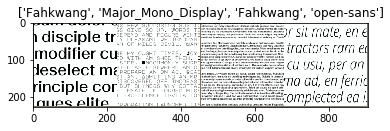

In [179]:
imshow(out, title=[class_names[x] for x in classes])

### Training the model

In [226]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=20):
    since = time.time()
    best_acc = 0.0
    best_model = copy.deepcopy(model.state_dict())
    
    for epoch in range(num_epochs):
        print("Epoch {}/{}".format(epoch, num_epochs - 1))
        print('-' * 10)
        
        for phase in ['train', 'test']:
            if phase == 'train':
                scheduler.step()
                model.train()
            else:
                model.eval()
                
            running_loss = 0.0
            running_corrects = 0
        
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)
                
                optimizer.zero_grad()
                
                
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    #print(outputs)
                    #print(_)
                    #print(preds)
                    #print(labels)
                    loss = criterion(outputs, labels)
                    
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()
                        
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)
            
            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]
            
            print('{} Loss: {:.4f} Acc:{:.4f}'.format(
                phase, epoch_loss, epoch_acc))
            
            
            if phase == 'test' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model = copy.deepcopy(model.state_dict())
            
        
        print()
    
    time_elapsed = time.time() - since
    print('Training complete in {:0f}m {:.0f}s'.format(
    time_elapsed // 60, time_elapsed % 60))
    print('Best val acc: {:4f}'.format(best_acc))
    
    model.load_state_dict(best_model)
    return model
                

In [203]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    
    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['test']):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            otuput = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            
            for j in range(inputs.size()[0]):
                images_so_far +=1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])
                
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [204]:
import ssl


In [205]:
ssl._create_default_https_context = ssl._create_unverified_context

In [224]:
model_ft = models.resnet18(pretrained=True)
num_frts = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_frts, len(class_names))

model_ft = model_ft.to(device)
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [227]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler)

Epoch 0/19
----------
train Loss: 2.3822 Acc:0.1967
test Loss: 2.5569 Acc:0.2368

Epoch 1/19
----------


Traceback (most recent call last):
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._han

KeyboardInterrupt: 